In [4]:
source("exchange.rate.arma.R")

system.time( { m <- train.jags(burn  = 2000, iter  = 40000) } )

m

Loading required package: rjags
Loading required package: coda
Linked to JAGS 4.0.0
Loaded modules: basemod,bugs

Attaching package: ‘R2jags’

The following object is masked from ‘package:coda’:

    traceplot



   user  system elapsed 
  5.676   0.225  23.656 

Inference for Bugs model at "arma2.2.jags", fit using jags,
 8 chains, each with 40000 iterations (first 2000 discarded), n.thin = 2
 n.sims = 152000 iterations saved
         mu.vect sd.vect    2.5%     25%     50%     75%   97.5%  Rhat n.eff
c          0.251   0.374  -0.366   0.045   0.229   0.443   1.017 1.022   910
delta      0.128   0.036   0.107   0.120   0.127   0.132   0.147 1.091  2600
m[1]       2.936   0.138   2.671   2.850   2.935   3.025   3.192 1.005  2000
m[2]       2.930   0.102   2.698   2.879   2.946   2.988   3.116 1.002  3700
m[3]       2.956   0.071   2.846   2.913   2.945   2.989   3.127 1.002  4800
m[4]       3.297   0.105   3.147   3.246   3.300   3.354   3.439 1.096  1500
m[5]       3.184   0.102   3.014   3.116   3.186   3.248   3.338 1.020   980
m[6]       3.452   0.118   3.295   3.377   3.437   3.524   3.662 1.040  2000
m[7]       3.462   0.110   3.240   3.394   3.476   3.535   3.622 1.012   900
m[8]       2.771   0.156   2.570   2.708   2.770   2.830   2.95

[1] 0.3829946
[1] 0.1135288


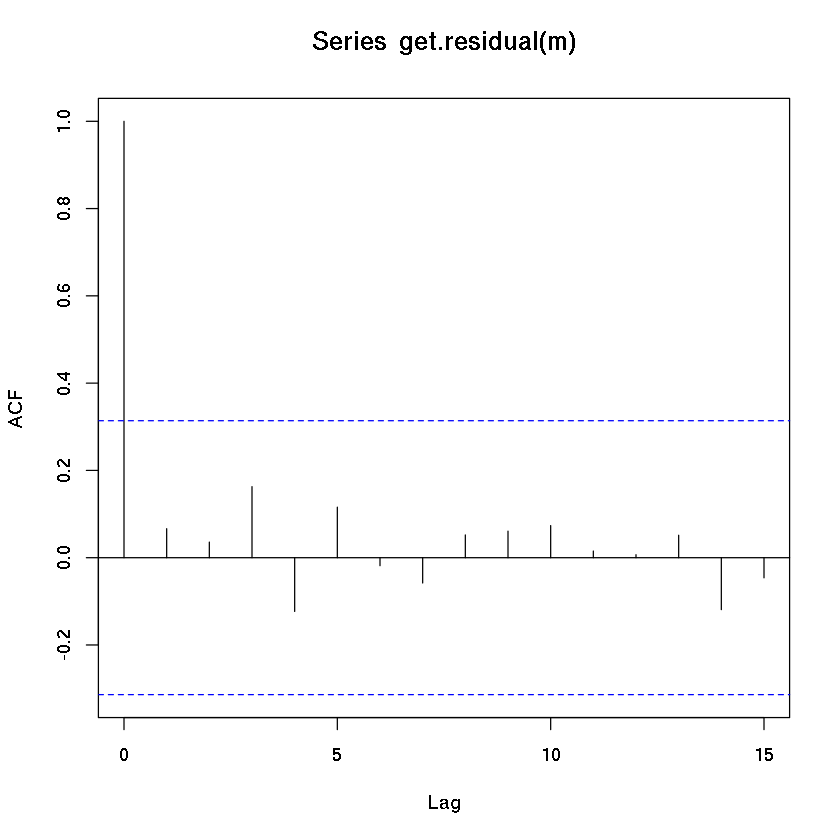

In [5]:
print(sd(x$xrate))
print(sd(get.residual(m)))
acf(get.residual(m))

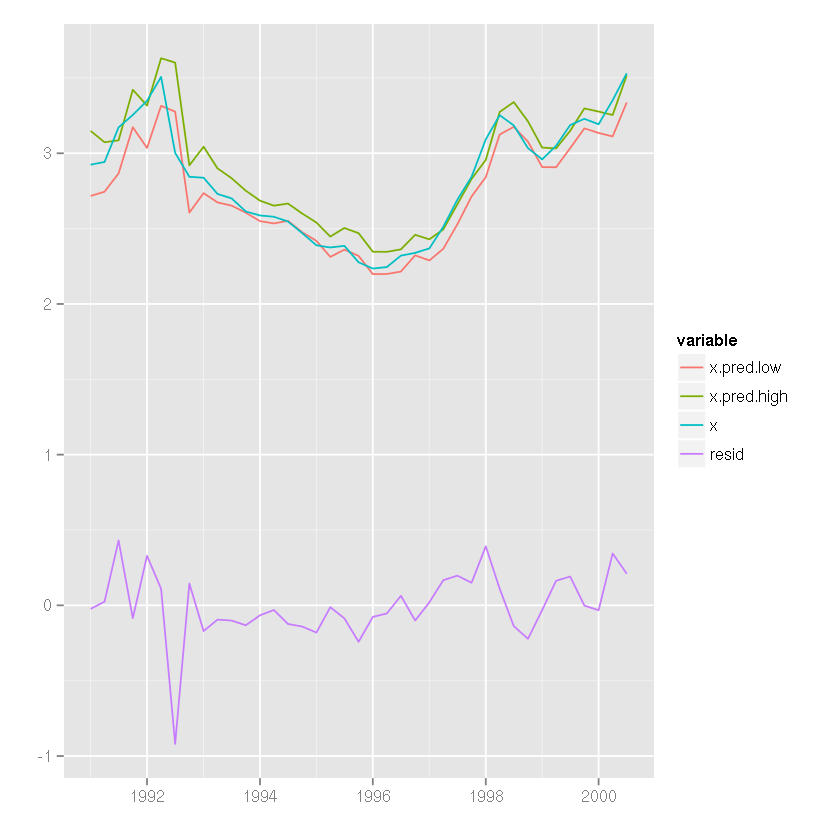

In [6]:
x.pred.low    <- ts(ql(0.05, m$BUGSoutput$sims.list$m), start = start(x.ts), frequency = frequency(x.ts))
x.pred.high   <- ts(ql(0.95, m$BUGSoutput$sims.list$m), start = start(x.ts), frequency = frequency(x.ts))
#ts.plot(x.pred.low, x.ts, x.pred.high, lty = c(3, 1, 3))
#ts.plot(get.residual(m))

library(tidyr)
library(ggplot2)
df <- data.frame(t           = time(x.ts),
                 x.pred.low  = as.vector(x.pred.low),
                 x.pred.high = as.vector(x.pred.high),
                 x           = as.vector(x.ts),
                 resid       = 2 * get.residual(m))
multi.ts <- ts(as.matrix(df[,2:5]), start = start(x.ts), frequency = frequency(x.ts))
#df <- df %>% gather(curve, value, -t)

#ggplot(data = df, aes(t, value, color = curve)) + geom_line()

library(ggfortify)
autoplot(multi.ts, facet = F)

In [7]:
x.arma <- arima(x.ts, order = c(2, 0, 2))
x.arma


Call:
arima(x = x.ts, order = c(2, 0, 2))

Coefficients:
         ar1     ar2     ma1     ma2  intercept
      0.2640  0.5907  1.2240  0.2240     2.9677
s.e.  0.2442  0.2089  0.2764  0.2649     0.2589

sigma^2 estimated as 0.01308:  log likelihood = 26.74,  aic = -41.48

[1] 0.1158704


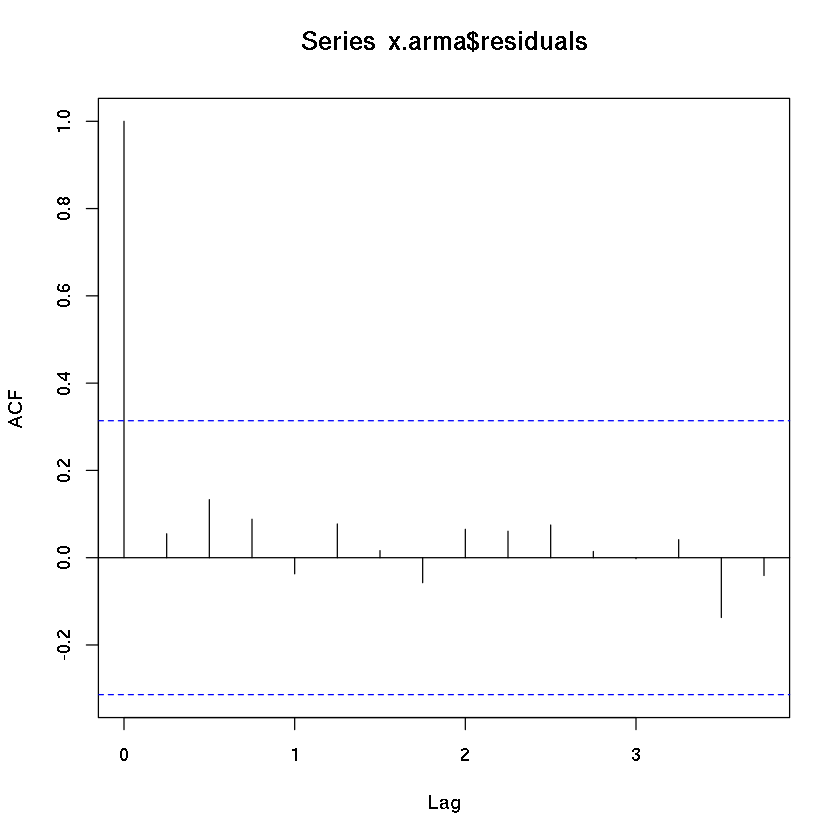

In [8]:
print(sd(x.arma$residuals))
acf(x.arma$residuals)

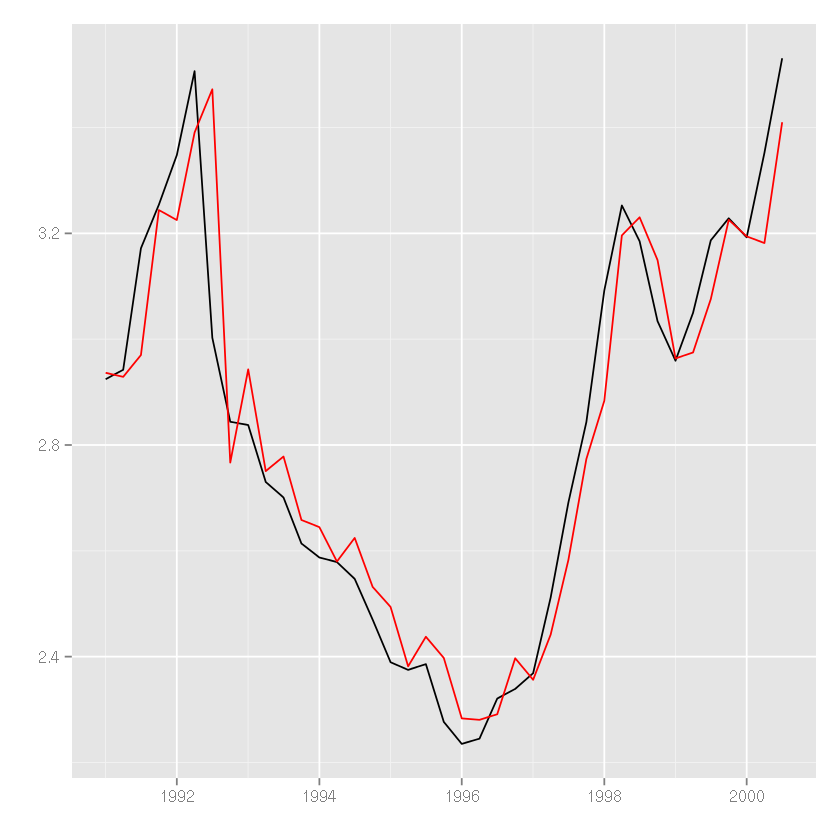

In [10]:
library(ggfortify)
autoplot(x.arma)

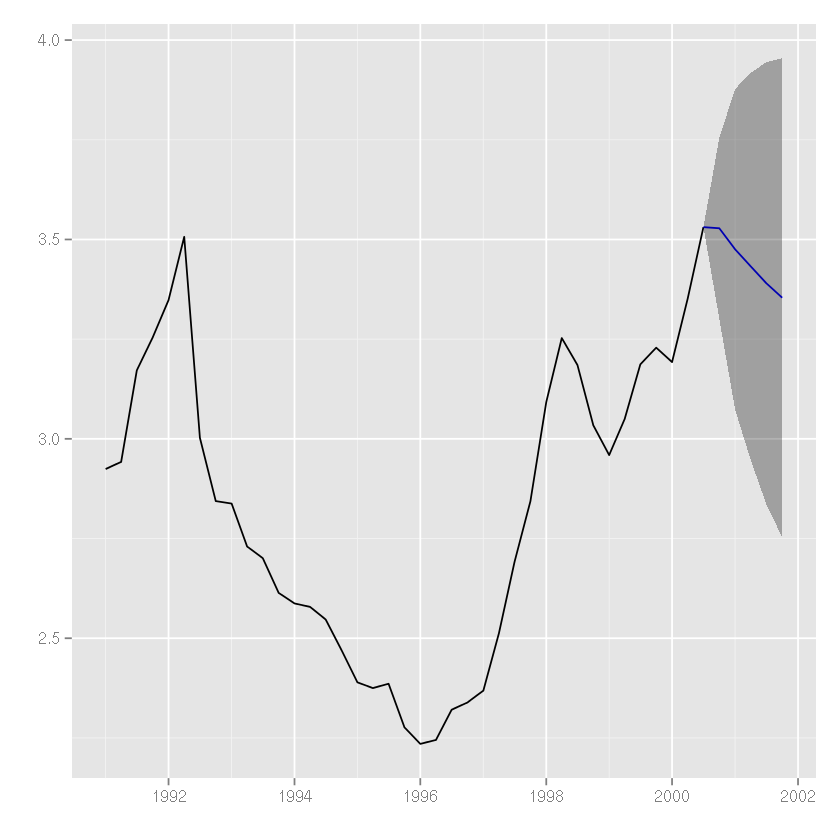

In [15]:
library(forecast)
x.forecast <- forecast(x.arma, level = c(95), h = 5)
autoplot(x.forecast)